In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
import pandas as pd
anime =pd.read_csv('/content/drive/MyDrive/miniproject/anime.csv')
synopsis = pd.read_csv('/content/drive/MyDrive/miniproject/anime_with_synopsis.csv')

In [ ]:
def clean(synopsis,anime):
  anime_fulldata=pd.merge(anime,synopsis,on='MAL_ID')
  anime_1 =anime_fulldata
  pop = pd.DataFrame()
  pop['Popular'] = anime_1['Watching'] + anime_1['Completed'] + anime_1['On-Hold'] + anime_1['Plan to Watch']  #dont add dropped (later)
  anime_fulldata = pd.concat([anime_fulldata, pop], axis=1, join="inner")
  anime =anime_fulldata
  anime_fulldata = anime_fulldata.drop(columns=['Popularity','Watching','Completed','On-Hold'])   
  anime_fulldata.rename(columns = {'MAL_ID':'anime_id','Genres_x':'Genres'}, inplace = True)
  anime_fulldata.rename(columns = {'Name_x':'Name'}, inplace = True)

  take = ['anime_id','Name','Genres','Type','Studios','Source','sypnopsis','Popular','Premiered']

  anime_fulldata = anime_fulldata[take]
  anime_fulldata= anime_fulldata.dropna()
  return anime_fulldata 

In [ ]:
def classi(anime):
  
  import matplotlib.pyplot as plt
  import seaborn as sb

  anime.drop(anime.loc[anime['Source']=='Unknown'].index, inplace=True)
  anime.drop(anime.loc[anime['Studios']=='Unknown'].index, inplace=True)
  anime.drop(anime.loc[anime['Type']=='Unknown'].index, inplace=True)
  anime.drop(anime.loc[anime['Premiered']=='Unknown'].index, inplace=True)

  anime_pop = anime[['anime_id','Name','Popular']]

  q ='Popular'
  q1 = anime_pop[q].quantile(0.25)
  q2 = anime_pop[q].quantile(0.50)
  q3 = anime_pop[q].quantile(0.75)
  IQR = q3-q1
  below = q1-1.5*IQR
  outli = q3+1.5*IQR
  max = anime_pop['Popular'].max()
  min = anime_pop['Popular'].min()

  hold =[]

  hold.append((min-1,q1))
  hold.append((q1,q2))
  hold.append((q2,q3))
  hold.append((q3,outli))
  a = max + outli
  hold.append((outli,a/3))
  hold.append((a/3,2*a/3))
  hold.append((2*a/3,max+1))

  threshold={
      str(i+1) : x for i,x in enumerate(hold)
  }

  POP ={}
  for i,x in threshold.items():
    a = anime_pop[ x[1] <=anime_pop[q]].count()
    b = anime_pop[ anime_pop[q] > x[0]].count()
    POP[i] =b['Popular'] - a['Popular']

  a = anime_pop[(anime_pop["Popular"] > hold[0][0]) & (anime_pop['Popular'] <= hold[0][1])]
  b = anime_pop[(anime_pop["Popular"] > hold[1][0]) & (anime_pop['Popular'] <= hold[1][1])]
  c = anime_pop[(anime_pop["Popular"] > hold[2][0]) & (anime_pop['Popular'] <= hold[2][1])]
  d = anime_pop[(anime_pop["Popular"] > hold[3][0]) & (anime_pop['Popular'] <= hold[3][1])]
  e = anime_pop[(anime_pop["Popular"] > hold[4][0]) & (anime_pop['Popular'] <= hold[4][1])]
  f = anime_pop[(anime_pop["Popular"] > hold[5][0]) & (anime_pop['Popular'] <= hold[5][1])]
  g = anime_pop[(anime_pop["Popular"] > hold[6][0]) & (anime_pop['Popular'] <= hold[6][1])]

  import numpy as np
  a['Pop_lable'] = np.where(a['Popular']!= 0 ,1,0)
  b['Pop_lable'] = np.where(b['Popular']!= 0 ,2,0)
  c['Pop_lable'] = np.where(c['Popular']!= 0 ,3,0)
  d['Pop_lable'] = np.where(d['Popular']!= 0 ,4,0)
  e['Pop_lable'] = np.where(e['Popular']!= 0 ,5,0)
  f['Pop_lable'] = np.where(f['Popular']!= 0 ,6,0)
  g['Pop_lable'] = np.where(g['Popular']!= 0 ,7,0)

  anime_clean = pd.concat([a,b,c,d,e,f,g])

  anime_fulldata=pd.merge(anime_clean,anime,on='anime_id')

  take = ['anime_id','Name_x','Genres','Studios','Source','sypnopsis','Popular_x','Pop_lable','Premiered']

  anime_fulldata = anime_fulldata[take]

  anime_fulldata.rename(columns = {'Name_x':'Name','Popular_x':'Popular'}, inplace = True)

  anime_premiered = pd.DataFrame()
  anime_premiered = anime_fulldata[['Name','Premiered','Popular']]
  anime_premiered[['Season','Year']] = anime_premiered["Premiered"].str.split(" ", 1, expand=True)
  anime_premiered = anime_premiered[['Name','Season','Popular']]

  anime_fulldata=pd.merge(anime_premiered,anime_fulldata,on='Name')
  anime_fulldata.rename(columns = {'Popular_x':'Popular'}, inplace = True)
  anime_fulldata.drop(columns = ['Popular_y'],inplace=True)

  re = ['anime_id','Name','Genres','Studios','Source','Season','sypnopsis','Popular','Pop_lable']
  anime_fulldata = anime_fulldata[re]
  return anime_fulldata

In [ ]:
anime_nclean = clean(synopsis,anime)
anime_clean = classi(anime_nclean)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [ ]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [ ]:
def encode_g(df,X_train,X_test,q):
  from keras.utils import np_utils
  X = df[['anime_id','Name','Genres','Studios','Source','Season','sypnopsis']]

  all_genres = {}
  for genres in X[q]:
    for genre in genres.split(','):
      try:
        all_genres[genre.strip()] += 1 
      except:
        all_genres[genre.strip()] = 1 
  gen=[]

  for i,x in all_genres.items():
    gen.append(i)

  so_mapper={}
  so_mapper['Unknown'] = 0  
  so_mapper = {x:(i+1) for i,x in enumerate(gen)}

  from numpy import zeros
  # create a one hot encoding for a list
  def one_hot_encode(genres, mapping):
    # create empty vector
    encoding = zeros(len(mapping)+1, dtype='uint8')
    for genre in genres.split(','):
      encoding[mapping[genre.strip()]] = 1

    return encoding
  
  a_1 = X_train[q].tolist()
  b_1 =X_test[q].tolist()

  train=[]
  for i in a_1:
    train.append(one_hot_encode(i,so_mapper))
  
  test=[]
  for i in b_1:
    test.append(one_hot_encode(i,so_mapper))


  from numpy import asarray
  dummy_x_train = asarray(train, dtype='uint8')
  dummy_x_test =asarray(test,dtype='uint8')

  return dummy_x_train,dummy_x_test,so_mapper

In [ ]:
def rm_stop(text):
  from nltk.corpus import stopwords
  stop_words = set(stopwords.words('english'))
  words = text.split()
  text=''
  for word in words:
    if word not in stop_words:
        text += (word+" ")
  return text

def lem(text):
  from nltk.stem import WordNetLemmatizer
  lemmatizer = WordNetLemmatizer()
  words = text.split()
  text=''
  for word in words:
    text+= (lemmatizer.lemmatize(word) + " ")
  return text 


In [ ]:
def encode_sypnopsis(X_train,X_test,num_words,maxlen):
 
  a =X_train.copy()
  b= X_test.copy()
  a['sypnopsis'] = a['sypnopsis'].apply(lambda x: rm_stop(x))
  a['sypnopsis'] = a['sypnopsis'].apply(lambda x: lem(x))


  b['sypnopsis'] = b['sypnopsis'].apply(lambda x: rm_stop(x))
  b['sypnopsis'] = b['sypnopsis'].apply(lambda x: lem(x))


  from keras.preprocessing.text import Tokenizer

  sentences_train = a['sypnopsis'].values
  sentences_test = b['sypnopsis'].values

  tokenizer = Tokenizer(num_words=num_words)

  tokenizer.fit_on_texts(sentences_train)
  tokenizer.fit_on_texts(sentences_test)

  train = tokenizer.texts_to_sequences(sentences_train)
  test = tokenizer.texts_to_sequences(sentences_test)

  vocab_size = len(tokenizer.word_index) + 1  

  from keras.preprocessing.sequence import pad_sequences

  maxlen = maxlen
  train = pad_sequences(train, padding='post', maxlen=maxlen)
  test = pad_sequences(test, padding='post', maxlen=maxlen)

  return train, test, vocab_size


In [ ]:
def encode(df,X_train,X_test,maxlen):

  from keras.utils import np_utils
  X = df
  X['Genres'] = X['Genres'].str.replace('Sci-Fi','SciFi')
  X_train['Genres'] = X_train['Genres'].str.replace('Sci-Fi','SciFi')
  X_test['Genres'] = X_test['Genres'].str.replace('Sci-Fi','SciFi')
  
  ##encode genres
  train_gen,test_gen,gen_mapper = encode_g(X,X_train,X_test,'Genres')

  #encode season
  train_se,test_se,se_mapper = encode_g(X,X_train,X_test,'Season')

  #encode studios
  train_st,test_st,st_mapper = encode_g(X,X_train,X_test,'Studios')

  # encode source
  train_so,test_so,so_mapper = encode_g(X,X_train,X_test,'Source')

  # Tokenize sypnopsis
  maxlen =maxlen
  max_words =2500
  train_sy,test_sy,vocab_size = encode_sypnopsis(X_train,X_test,max_words,maxlen)

  return train_gen,test_gen,train_se,test_se,train_st,test_st,train_so,test_so,train_sy,test_sy,vocab_size,\
  gen_mapper,se_mapper,st_mapper,so_mapper

In [ ]:
from keras.models import Model
import tensorflow as tf
from keras.layers import Dense
from keras.layers import add
from keras.layers.merge import concatenate

def create_model(gen_size,season_size,studio_size,source_size,maxlen,vocab_size,p):

  def emb_sz_rule(n_cat): 
    return min(600, round(1.6 * n_cat**0.56)) # fast ai

  Input1 = tf.keras.layers.Input(shape=(gen_size,))
  e_1 = tf.keras.layers.Embedding(
      gen_size, 
      emb_sz_rule(gen_size), 
      input_length=1)(Input1)

  x1 = tf.keras.layers.Flatten()(e_1)
  x1 = tf.keras.layers.Dense(5, activation='relu')(x1)

  Input2 = tf.keras.layers.Input(shape=(season_size,))
  e_2 = tf.keras.layers.Embedding(
      season_size, 
      emb_sz_rule(season_size), 
      input_length=1)(Input2)
  x2 = tf.keras.layers.Dropout(p)(e_2)
  x2 = tf.keras.layers.Flatten()(e_2)
  x2 = tf.keras.layers.Dense(5, activation='relu')(x2)

  Input3 = tf.keras.layers.Input(shape=(studio_size,))
  e_3 = tf.keras.layers.Embedding(
      studio_size, 
      emb_sz_rule(studio_size), 
      input_length=1)(Input3)

  x3 = tf.keras.layers.Flatten()(e_3)
  x3 = tf.keras.layers.Dense(5, activation='relu')(x3)

  Input4 = tf.keras.layers.Input(shape=(source_size,))
  e_4 = tf.keras.layers.Embedding(
      source_size, 
      emb_sz_rule(source_size), 
      input_length=1)(Input4)

  x4 = tf.keras.layers.Flatten()(e_4)
  x4 = tf.keras.layers.Dense(5, activation='relu')(x4)

  # LSTM (feature extraction)
  Input5 = tf.keras.layers.Input(shape=(maxlen,))
  e_5 = tf.keras.layers.Embedding(
      input_dim =vocab_size, 
      output_dim = 50, 
      input_length=maxlen)(Input5)  
  x5 = tf.keras.layers.SpatialDropout1D(0.2)(e_5)
  x5 = tf.keras.layers.LSTM(units=50,dropout=0.2)(x5)
  x5 = tf.keras.layers.Dense(5, activation='relu')(x5)

  # concate output
  decoder2 = concatenate([x1,x2,x3,x4,x5])

  # randomly choose number of neurons (all relu)
  h1 = tf.keras.layers.Dense(10, activation='relu')(decoder2)
  h1 = tf.keras.layers.BatchNormalization()(h1)
  h1 = tf.keras.layers.Dropout(p)(h1)

  h1 = tf.keras.layers.Dense(10, activation='relu')(h1)
  h1 = tf.keras.layers.Dropout(p)(h1)

  outputs = Dense(7, activation='softmax')(h1)

  model = Model(inputs=[Input1,Input2,Input3,Input4,Input5], outputs=outputs)

  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  return model

In [ ]:
X = anime_clean[['anime_id','Name','Genres','Studios','Source','Season','sypnopsis']]
Y = anime_clean[['Pop_lable']]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, test_size=0.33, random_state=42)

In [ ]:
y_train['Pop_lable'].unique()

array([2, 5, 1, 4, 3, 6, 7])

In [ ]:
a = y_train['Pop_lable'].value_counts()
a = pd.DataFrame({'Pop_lable':(a.index), 'Count':a.values})
a['Pop_lable'].astype(str)
a

,Pop_lable,Count
0,3,633
1,2,622
2,1,606
3,4,358
4,5,232
5,6,40
6,7,3


Text(0.5, 0, 'Pop_lable')

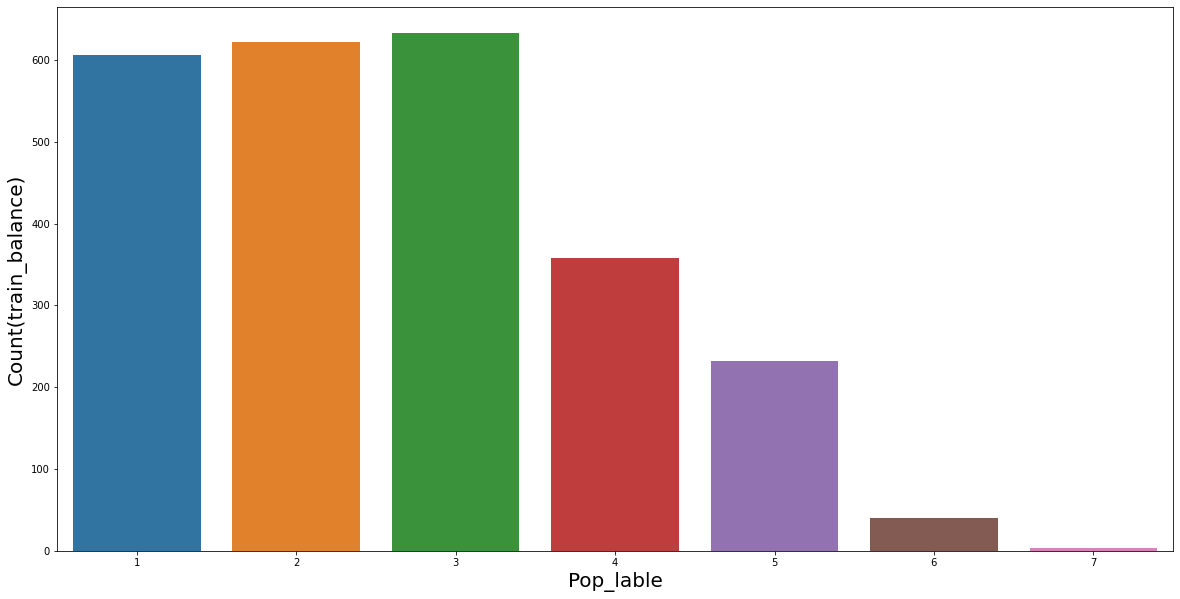

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb
f = plt.figure(figsize=(20, 10))
ax = sb.barplot(x="Pop_lable", y="Count", data=a)
ax.set_ylabel("Count(train_balance)", fontsize = 20)
ax.set_xlabel("Pop_lable", fontsize = 20)

In [ ]:
y_u = Y['Pop_lable'].unique().tolist()
Y_mapper = {x:i for i,x in enumerate(y_u)}

import numpy as np
from keras.utils import np_utils
y_train['Pop_lable'] =y_train['Pop_lable'].map(Y_mapper)
y_test['Pop_lable'] =y_test['Pop_lable'].map(Y_mapper)

dummy_y_train = np_utils.to_categorical(y_train)
dummy_y_test = np_utils.to_categorical(y_test)

In [ ]:
max_len =100
train_gen,test_gen,train_se,test_se,train_st,test_st,train_so,test_so,train_sy,test_sy,vocab_size,gen_mapper,se_mapper,st_mapper,so_mapper= encode(anime_clean,X_train,X_test,max_len)

In [ ]:
gen_size = train_gen.shape[1]
season_size = train_se.shape[1]
studio_size = train_st.shape[1]
source_size = train_so.shape[1]
maxlen=max_len
p=0.2

model = create_model(gen_size,season_size,studio_size,source_size,maxlen,vocab_size,p)

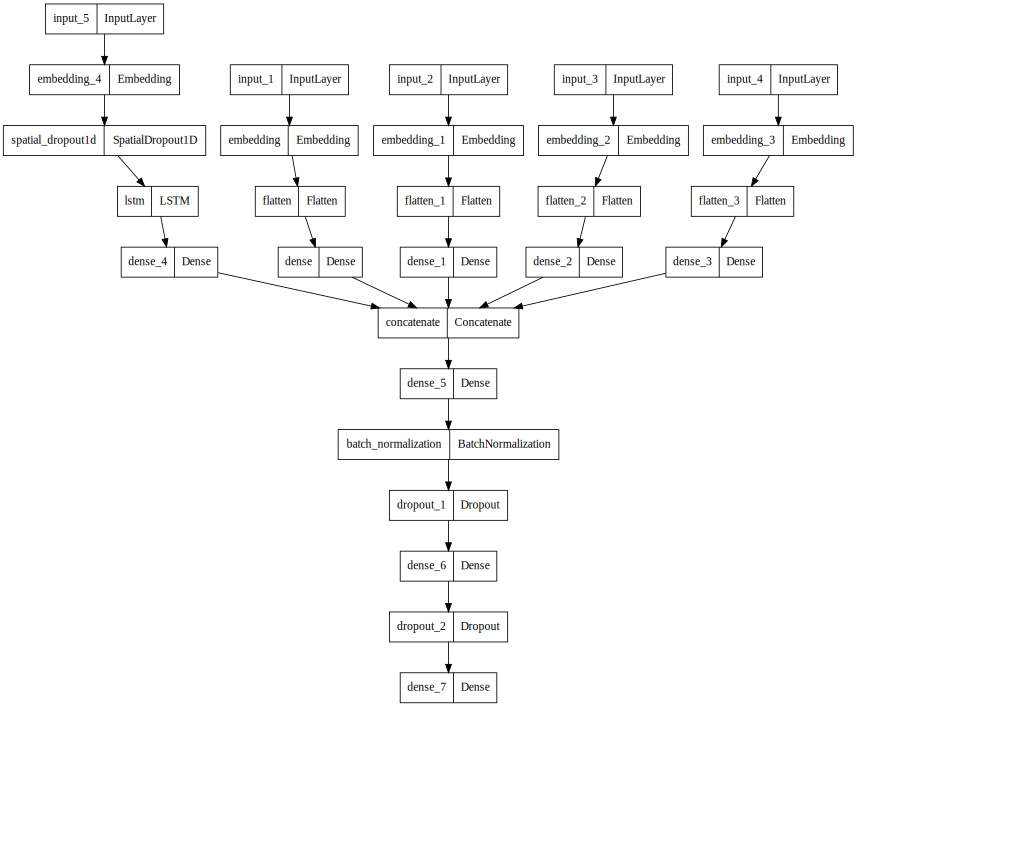

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes= False, show_layer_names=True, dpi=60).create(prog='dot',format='svg'))

Epoch 1/30
10/10 [==============================] - 15s 675ms/step - loss: 1.9379 - accuracy: 0.1632 - val_loss: 1.9541 - val_accuracy: 0.0968
Epoch 2/30
10/10 [==============================] - 3s 265ms/step - loss: 1.9172 - accuracy: 0.1937 - val_loss: 1.9567 - val_accuracy: 0.0968
Epoch 3/30
10/10 [==============================] - 3s 263ms/step - loss: 1.8907 - accuracy: 0.2289 - val_loss: 1.9663 - val_accuracy: 0.0968
Epoch 4/30
10/10 [==============================] - 3s 261ms/step - loss: 1.8626 - accuracy: 0.2414 - val_loss: 1.9859 - val_accuracy: 0.0968
Epoch 5/30
10/10 [==============================] - 3s 261ms/step - loss: 1.8368 - accuracy: 0.2751 - val_loss: 2.0096 - val_accuracy: 0.0968
Epoch 6/30
10/10 [==============================] - 3s 261ms/step - loss: 1.8033 - accuracy: 0.3244 - val_loss: 2.0256 - val_accuracy: 0.1221
Epoch 7/30
10/10 [==============================] - 3s 263ms/step - loss: 1.7744 - accuracy: 0.3392 - val_loss: 2.0665 - val_accuracy: 0.1221
Epoch

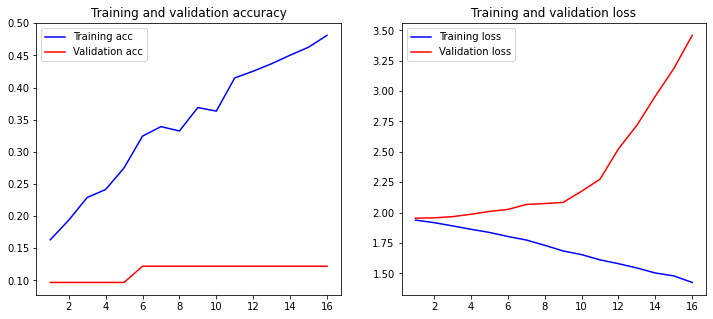

In [ ]:
from keras.callbacks import EarlyStopping

callback=EarlyStopping(
    monitor='val_accuracy', min_delta=0, patience=10, verbose=1, mode='auto',
    baseline=None, restore_best_weights=True)

# from sklearn.utils import compute_class_weight
# y_integers = np.argmax(y_train, axis=1)
# class_weights = compute_class_weight(class_weight = 'balanced', classes = np.unique(y_train),y = y_train)
# class_weights = dict(zip(np.unique(y_train), class_weights))

history = model.fit(x=[train_gen,train_se,train_st,train_so,train_sy], y=dummy_y_train, 
                    batch_size=250,
                    epochs=30, 
                    validation_data=([test_gen,test_se,test_st,test_so,test_sy], dummy_y_test),
                    verbose=1,
                    callbacks=[callback]
                  
)


loss, accuracy  = model.evaluate([train_gen,train_se,train_st,train_so,train_sy], dummy_y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy))
loss, accuracy = model.evaluate([test_gen,test_se,test_st,test_so,test_sy], dummy_y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy))
plot_history(history)

In [ ]:
# now we wanted to predict
def get_pre(name,sypnopsis,genres,season,studio,source,gen_mapper,se_mapper,st_mapper,so_mapper,Y_mapper,model,maxlen):
  
  from numpy import zeros
  from numpy import asarray
  from keras.utils import np_utils

  ## Name abandon

##------------encode genres-------#
  def one_hot_encode(genres, mapping):
  # create empty vector
    encoding = zeros(len(mapping)+1, dtype='uint8')
    for genre in genres.split(','):
      try:
        G = mapping[genre.strip()]
        encoding[G] = 1
      except:
        encoding[0] = 1

    return encoding
      
  train=[]
  train.append(one_hot_encode(genres,gen_mapper))

  gen_pred = asarray(train, dtype='uint8')

##----------encode season-----------------##

  train=[]
  train.append(one_hot_encode(season,se_mapper))

  se_pred = asarray(train, dtype='uint8')


##-----------encode studio-----------------##

  train=[]
  train.append(one_hot_encode(studio,st_mapper))

  st_pred = asarray(train, dtype='uint8')

##--------encode source--------------------##
  train=[]
  train.append(one_hot_encode(source,so_mapper))

  so_pred = asarray(train, dtype='uint8')

##--------- tokenize synopsis--------##
  from keras.preprocessing.text import Tokenizer
  from keras.preprocessing.sequence import pad_sequences
  sypnopsis = rm_stop(sypnopsis)
  sypnopsis = lem(sypnopsis)


  tokenizer = Tokenizer(num_words=2000)

  pred = []
  pred.append(sypnopsis)
  tokenizer.fit_on_texts(pred)
  #pred.append(' ')
  pred = tokenizer.texts_to_sequences(pred)
  pred = pad_sequences(pred, padding='post', maxlen=maxlen)
  sypnopsis = asarray(pred, dtype='uint8')
  sypnopsis = asarray(sypnopsis,dtype ='uint8')

##------ predcit---------###
  predictions = model.predict(x=[gen_pred,se_pred,st_pred,so_pred,sypnopsis])
  pred1 = predictions.tolist()
  pred2 = pred1[0]
  max_value = max(pred2)
  max_index = pred2.index(max_value)

  return max_index+1

  

In [ ]:
def get_input():
  name = input('Name of anime: ')
  sypnopsis = input('Synopsis of anime: ')
  genres = input('Genres of anime (XX,YY)): ')
  season= input('season anime premiered: ')
  source= input('source of original story: ')
  studio =input('Studios produce (XX,YY):')

  return name,sypnopsis,genres,season,studio,source

In [ ]:
##--------------------------------------just give some exmaple anime----------#
a= anime_clean['Name'].tolist()
b = anime_clean['sypnopsis'].tolist()
c = anime_clean['Genres'].tolist()
d = anime_clean['Studios'].tolist()
e = anime_clean['Season'].tolist()
f = anime_clean['Source'].tolist()

In [ ]:
try:
  try_name = 'Kaijuu Step Wandabada 2nd Season'
  p =a.index(try_name)
except:
  print('Cant find anime in dataset')

In [ ]:
print('Name: '+str(a[p]))
print('Sypnopsis= '+str(b[p]))
print('Genres: '+str(c[p]))
print('Season: '+str(e[p]))
print('Source: '+str(f[p]))
print('Studios: '+str(d[p]))

Name: Kaijuu Step Wandabada 2nd Season
Sypnopsis= Second season of Kaijuu Step Wandabada .
Genres: Comedy, Kids
Season: Fall
Source: Picture book
Studios: Usagi Ou


In [ ]:
## run this cell repeatedly to get prediction
name,sypnopsis,genres,season,studio,source = get_input()

Name of anime: Spy X Family
Synopsis of anime: For the agent known as "Twilight," no order is too tall if it is for the sake of peace. Operating as Westalis' master spy, Twilight works tirelessly to prevent extremists from sparking a war with neighboring country Ostania. For his latest mission, he must investigate Ostanian politician Donovan Desmond by infiltrating his son's school: the prestigious Eden Academy. Thus, the agent faces the most difficult task of his career: get married, have a child, and play family.  Twilight, or "Loid Forger," quickly adopts the unassuming orphan Anya to play the role of a six-year-old daughter and prospective Eden Academy student. For a wife, he comes across Yor Briar, an absent-minded office worker who needs a pretend partner of her own to impress her friends. However, Loid is not the only one with a hidden nature. Yor moonlights as the lethal assassin "Thorn Princess." For her, marrying Loid creates the perfect cover. Meanwhile, Anya is not the ordi

In [ ]:
pred= get_pre(name,sypnopsis,genres,season,studio,source,gen_mapper,se_mapper,st_mapper,so_mapper,Y_mapper,model,maxlen)
print(pred)

4
